<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Портрет пользователя каждого региона" data-toc-modified-id="Портрет пользователя каждого региона"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span></div>

# Анализ рынка компьютерных игр
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')
games.sample(n=5, random_state=5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9084,Pipe Mania,PS2,2008.0,Puzzle,0.07,0.05,0.00,0.02,68.0,tbd,E
4870,Planet 51,DS,2009.0,Action,0.22,0.14,0.00,0.04,NaN,tbd,E
15561,Tsuki ni Yori Sou Otome no Sahou: Hidamari no ...,PSV,2015.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7767,Shiren the Wanderer,Wii,2008.0,Role-Playing,0.08,0.00,0.11,0.01,71.0,7.6,T
5345,High School Musical 3: Senior Year DANCE!,PS2,2008.0,Misc,0.17,0.13,0.00,0.04,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
- Year_of_Release имеет тип флоат, у года не может быть дробной части, так что лучше его привести к int или datetime, помимо этого унекоторых игр пропущен год релиза,можно подумать чем его заменить.
- Critic_Score, User_Score и Rating имеется много пропущенных значений, нужно решить как их заменить

## Предобработка данных


- Замените названия столбцов (приведите к нижнему регистру);

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [6]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

У года не может быть дробной части, так что лучше его привести к int, так как у нас нет информации о месяце и числе нам не стоит использовать формат datetime.

- Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

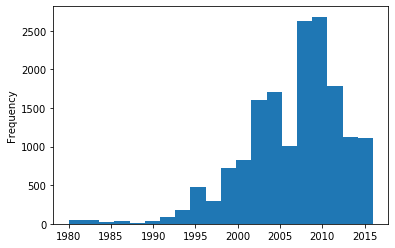

In [7]:
games['year_of_release'].plot(kind='hist', bins=20)

In [8]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('platform')['year_of_release'].transform('median'))

Распределение лет релиза ассиметрично, поэтому заменим пропуски в данном столбце на медианное значение по выборке.

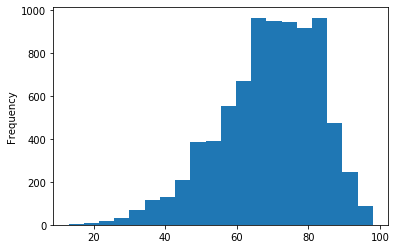

In [9]:
games['critic_score'].plot(kind='hist', bins=20)

In [10]:
games['critic_score'] = games['critic_score'].fillna(0)

Расспределение оценок критиков близко к нормальному, поэтому можем заменить пропуски на среднее значение по выборке. Пропуски в данном столбце могли возникнуть так как какие-то игры не успели оценить критики или какие-то игры стали популярны у пользователей, но пока не были оценены критиками.

Tbd значит to be determined, то есть пользователи еще не определились со своей оценкой, мы можем заменить их на na, что позволит нам изменить тип данных на float.

In [11]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'] = games['user_score'].astype(float)

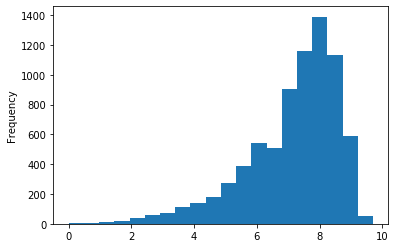

In [12]:
games['user_score'].plot(kind='hist', bins=20)

In [13]:
games['user_score'] = games['user_score'].fillna(0)

Заменим оценку пользователей на медиану, так как мы видим сильную ассиметрию расспределения в левую сторону.

Заменить рейтинг игр сложнее, так как он зависит от многих факторов. Оставим пропуски в нем пока без изменений.

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

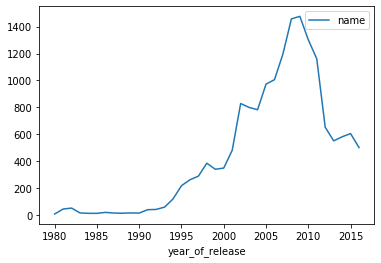

In [15]:
games_on_period  = games[['year_of_release','name']].groupby(['year_of_release']).agg(['count'])
sns.lineplot(data=games_on_period)

Из графика видно, что наибольшей популярности игры достигли с 2000 по 2010 год, в другие годы спрос был значительно ниже. 

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


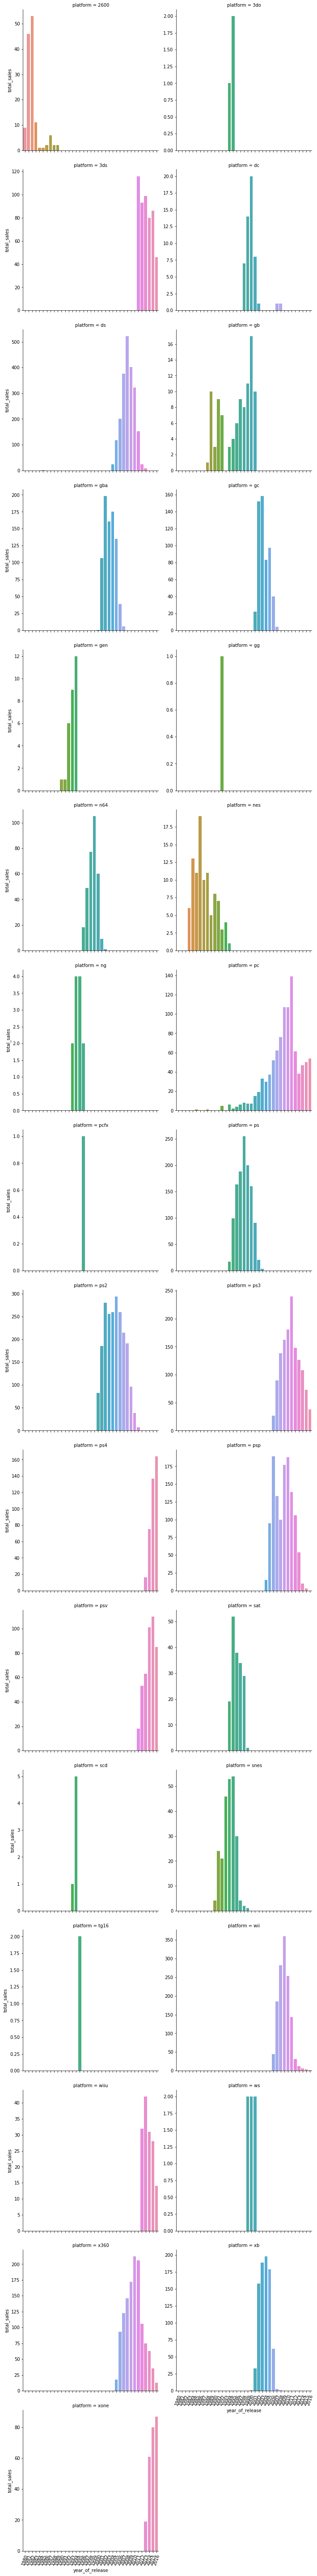

In [16]:
games_on_platform = games[['year_of_release','total_sales', 'platform']].groupby(['platform', 'year_of_release']).agg(['count'])
games_on_platform.columns = games_on_platform.columns.droplevel(0)
games_on_platform = games_on_platform.reset_index()
games_on_platform.columns = ['platform', 'year_of_release', 'total_sales']

g = sns.factorplot(x='year_of_release', y='total_sales', 
               col='platform', data= games_on_platform, kind='bar', col_wrap=2,
              sharey=False)
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=70)

Мы видим, что у большинства платформ пик популярности не длиться более 5 лет, однако у самых популярных платформ время максимальных мродаж может длиться и около 10 лет. 

In [17]:
top_6_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_6_platforms
top_6_platforms_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps4']

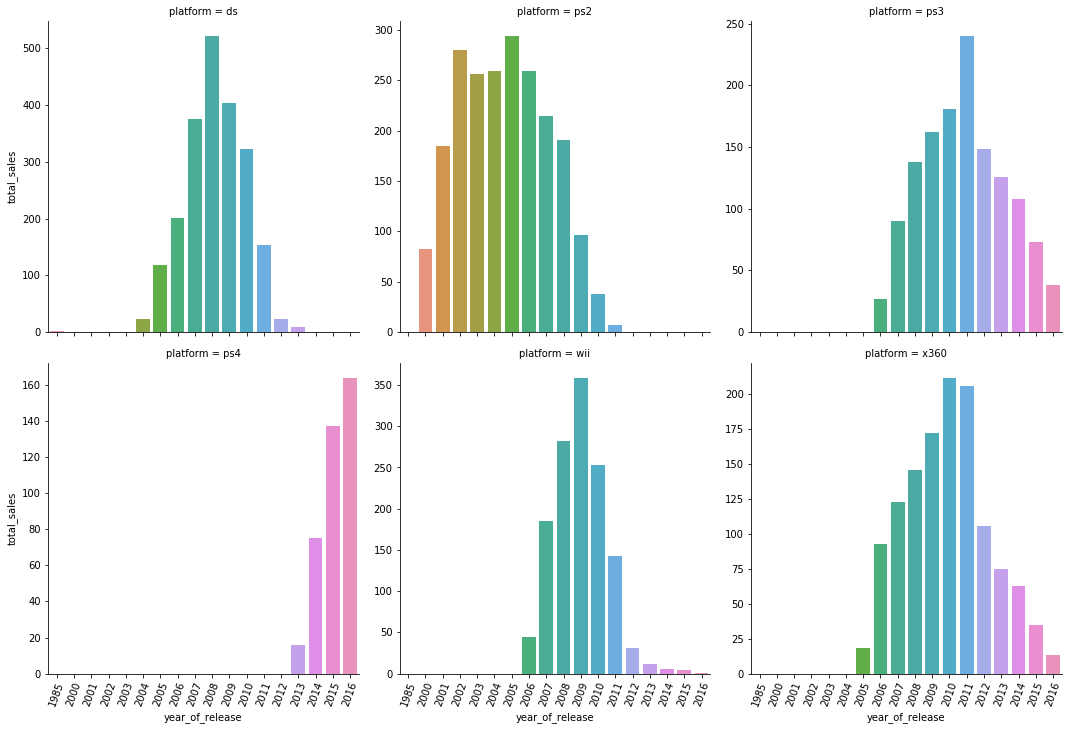

In [18]:
games_on_platform_top = games_on_platform.query('platform in @top_6_platforms_list')
g = sns.factorplot(x='year_of_release', y='total_sales', 
               col='platform', data= games_on_platform_top, kind='bar', col_wrap=3,
              sharey=False)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=70)

Для 5 платформ с наибольшими продажами в среднем период продаж составляет до 8-10 лет, в основном продажи имеют форму нормального расспределения, платформе нужно около 3-4 лет чтобы достигнуть своего максимума продаж потом она идет на спад. Отдельно хочется отметить платформу PS2 у которой пик продаж держался на уровне 250 тыс около 6 лет и лишь потом пошел на спад, хотя обычно платформы после достижения своего пика идут на спад уже через год. 

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Большинство из наиболее прибыльных платформ к 2016 году уже перестали быть популярны. Из нашего топ-6 платформ только x360, ps3, ps4 все еще имеют не нулевой уровень продаж. Можно предположить, что если платформа имеет 0 или близкий к нулю уровень продаж к 2016 году, то в 2017 это останется без изменений, поэтому для прогноза на 2017 год нам такие платформы не очень интересны. 
Составим тогда новый топ игр, не за все время, а только те, которые имеют какой-то уровень продаж за 2016 год.

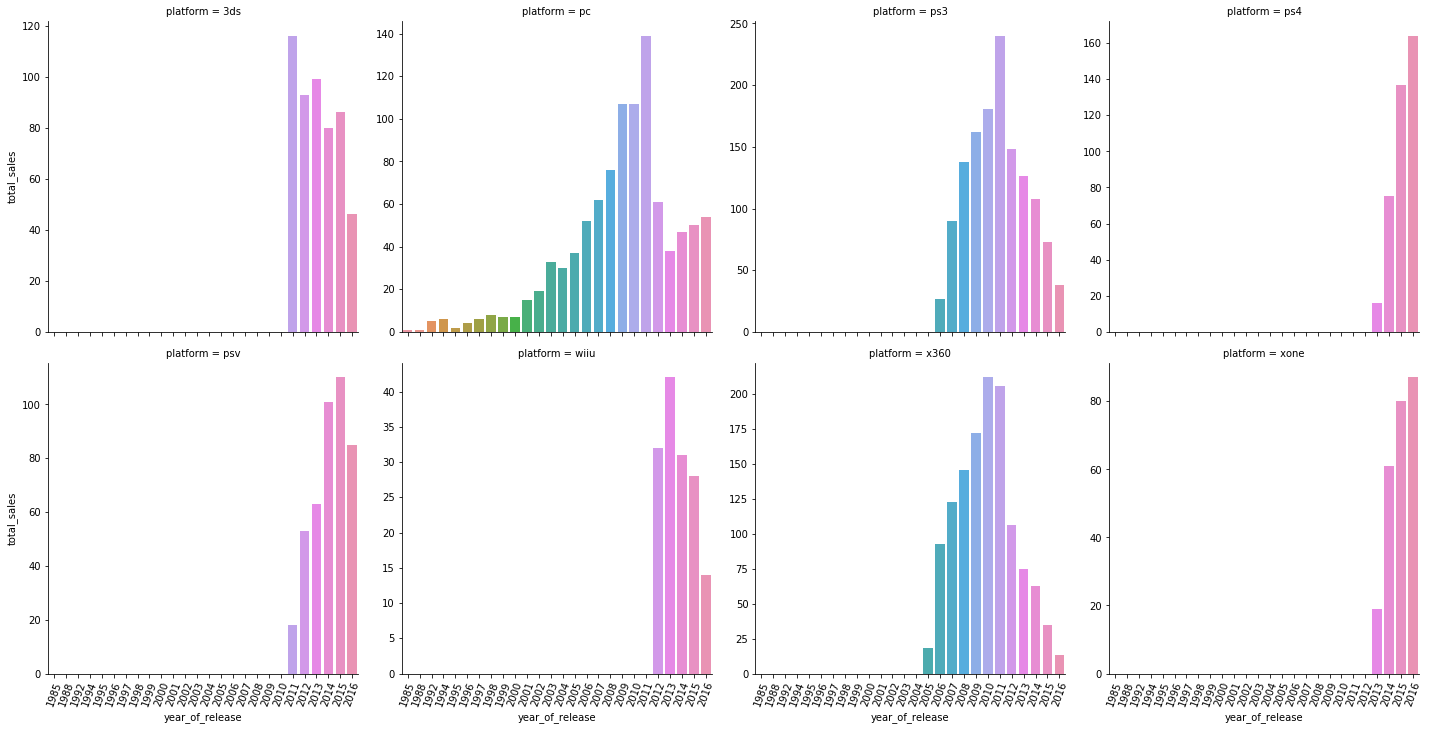

In [19]:
games_on_platform_top_act = games_on_platform.query('year_of_release == 2016 and total_sales > 10')
games_on_platform_top_act  = games_on_platform.query('platform in @games_on_platform_top_act.platform')
g = sns.factorplot(x='year_of_release', y='total_sales', 
               col='platform', data= games_on_platform_top_act, kind='bar', col_wrap=4,
              sharey=False)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=70)

Исходя из предыдущего анализа мы знаем, что срок жизни игровой платформы от 6 до 10 лет. Мы видим, что набирающе популярность платформы такие как XOne и PSV начали свой рост начиная с 2011 года. Для каких-то платформ пик популярности пришелся на 2008-2009 годы, поэтому я решила взять в анализ данные начиная с 2010 года, чтобы учесть разные периоды цикла платформ сохранивших какую-то популярность к 2016 году.

In [20]:
period_data = games[games['year_of_release'] > 2010]
period_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,14.60


In [21]:
group_period_data = period_data[['platform','total_sales']].groupby(['platform']).agg(['sum'])
group_period_data.columns = group_period_data.columns.droplevel(0)
group_period_data = group_period_data.reset_index()
group_period_data.columns = ['platform', 'total_sales']
list_of_top_7_act = group_period_data.sort_values(by=['total_sales'], ascending=False).head(7).platform

In [22]:
games_on_platform_top_act_2010  = games_on_platform.query('platform in @list_of_top_7_act')
games_on_platform_top_act_2010.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,6.0,86.666667,23.457763,46.0,81.50,89.5,97.50,116.0
pc,26.0,37.461538,37.454218,1.0,6.25,31.5,53.50,139.0
ps3,11.0,121.000000,62.963481,27.0,81.50,126.0,155.00,240.0
ps4,4.0,98.000000,66.156380,16.0,60.25,106.0,143.75,164.0
wii,11.0,120.000000,131.065632,1.0,9.00,44.0,219.00,359.0
x360,12.0,105.166667,68.679537,13.0,56.00,99.5,152.50,212.0
xone,4.0,61.750000,30.543685,19.0,50.50,70.5,81.75,87.0


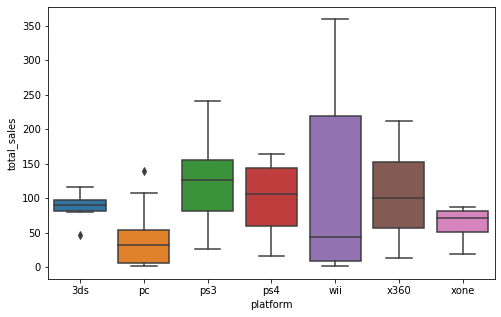

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=games_on_platform_top_act_2010, x='platform', y='total_sales')

На графике ящика с усами мы видим, что расспределения отличаются друг от друга не только средними значениями, но и дисперсией своих продаж за данные 6 лет, из этого можно предположить, что наши 7 платформ находятся на расзных стадиях развития. Соотносясь с графиками, которые мы строили выше можно сделать вывод, что такие платформы как Wii, x360, PS3 имеют большую дисперсию за счет того что за данные 6 лет мы пронаблюдали большую часть развития их жизненого цикла и подъем и спад. Скорее всего в дальнейшем интерес к этим платформам будет только угасать. А платформы XOne, PS4, PC наоборот только достигли или достигают своего расцвета, поэтому можно ожидать продолжения их роста или умеренного спада. Интересная ситуация с PC так как здесь мы видим выброс в стороне высоких значений, а на графике по годам можно видеть увеличение пользовательского интереса начиная с 2013 года, так что можно предположить, что данная платформа выходит на второй пик своей популярности.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

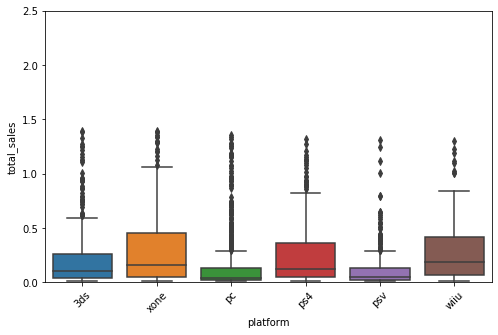

In [35]:
games_top_7_platforms = games[games['platform'].isin(['3ds', 'pc', 'ps3', 'ps4', 'wiiu', 'x360', 'xone'])]
plt.figure(figsize=(8,5))
plt.ylim((0,2.5))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.xticks(rotation=45)


    
*  Видно, что у графиков за весь периуд много выбросов.
    
*  Если смотреть по медиане, то больше всего продаж у WiiU, затем XOne.
    
*  Большое число выбросов у ПК можно объяснить тем, что игры на персональных компьютерах были популярны во время всего периуда наблюдения и в 2015 у них начался новый подъем. Ситуация с 3ds и psv другая, здесь скорее число аутлаеров связано с ассиметрией расспределений, чем с началом нового пика как у ПК.


- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.


In [25]:
xone = games[games['platform']=='xone']
xone['user_score'].corr(xone['total_sales'])

0.11656261405851895

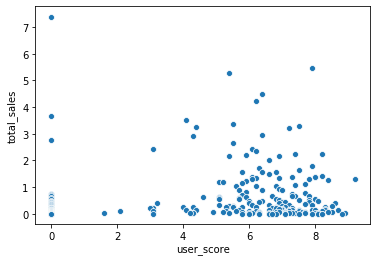

In [26]:
sns.scatterplot(x='user_score', y='total_sales', data=xone)

In [27]:
xone = games[games['platform']=='xone']
xone['critic_score'].corr(xone['total_sales'])

0.2748391874944539

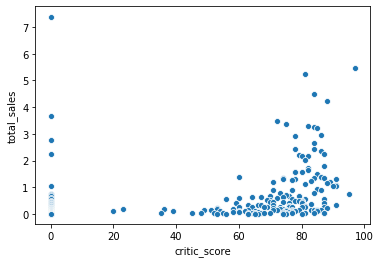

In [28]:
sns.scatterplot(x='critic_score', y='total_sales', data=xone)

Для XOne оценка критиков сильнее коррелирует с продажами, чем оценка пользователей. Оценка критиков выше 80 приводит к сильному увеличению продаж.

In [29]:
g_sales = period_data[['platform', 'total_sales', 'critic_score', 'user_score']]

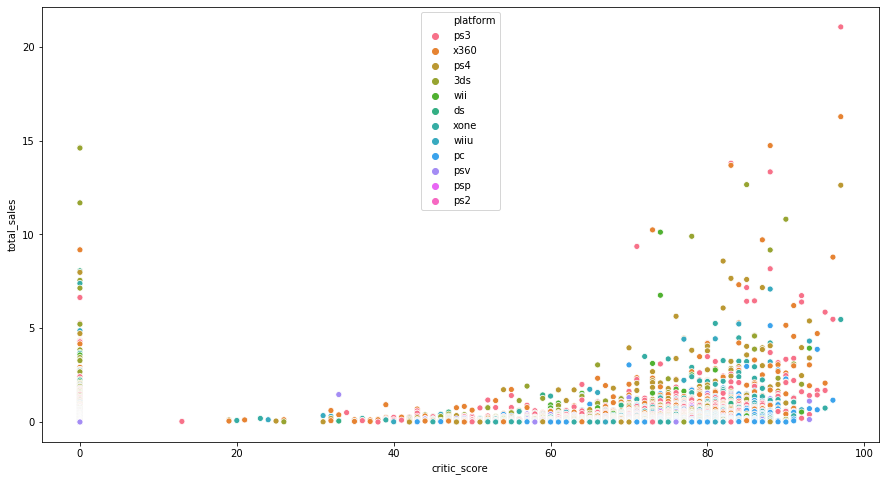

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=g_sales, x='critic_score', y='total_sales', hue='platform')

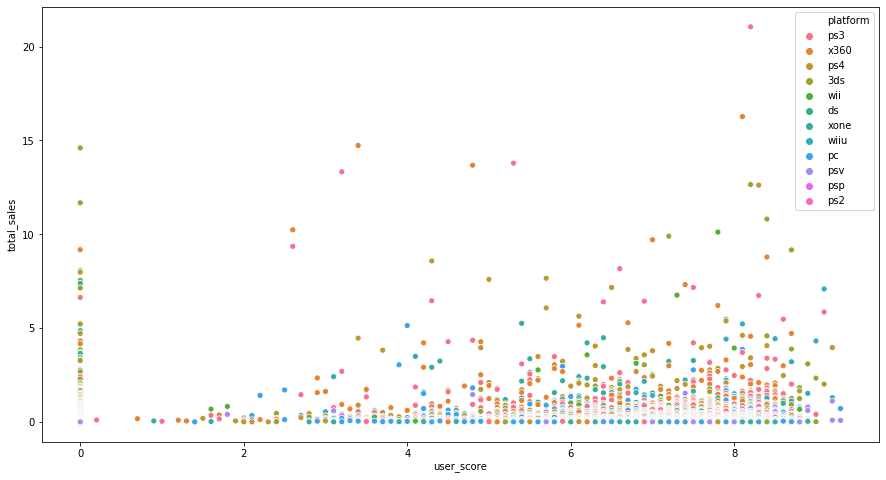

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=g_sales, x='user_score', y='total_sales', hue='platform')

Связь между оценками критиков и продажами есть не только для Xone, но и для 3DS и PS4. Однако связь не очень сильная, исходя из графика мы можем предволожить, что она носит скорее экспотенциальный, чем линейный характер. Оценки пользователей имеют влияние(кореляция в районе 0,2) для 3DS и Wii. Для ПК и та и та оценка имеет относительно слабое влияние на финальные продажи. 

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [32]:
period_data[['genre','total_sales']].groupby(['genre'], as_index=False).count().sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,action,1277
7,role-playing,469
1,adventure,413
10,sports,393
3,misc,378
8,shooter,331
6,racing,183
2,fighting,159
9,simulation,139
4,platform,123


In [33]:
period_data[['genre','total_sales']].groupby(['genre'], as_index=False).sum().sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,action,561.92
8,shooter,403.23
7,role-playing,245.98
10,sports,237.80
3,misc,141.35
6,racing,89.22
4,platform,89.16
2,fighting,66.90
9,simulation,50.82
1,adventure,45.16


Больше всего игр в жанрах action, role-playing, adventure, sports. А самые прибыльные жанры action,shooter, role-playing, sports.

In [34]:
period_data[['genre','total_sales']].groupby(['genre'], as_index=False).median().sort_values(by='total_sales', ascending=False)

,genre,total_sales
8,shooter,0.41
10,sports,0.20
4,platform,0.19
2,fighting,0.18
6,racing,0.16
7,role-playing,0.15
0,action,0.13
3,misc,0.13
9,simulation,0.11
11,strategy,0.08



Шутеры продаются лучше, хотя игр в этом жанре выпускается меньше.


### Вывод по исследовательскому анализу данных:
- C 90-x начался рост интереса к видео играм, однако лидирующие платформы сильно менялись за данный период.
- Жизненый цикл платформы от роста интереса до упадка составляет около 6-10 лет, однако в период до 2000-х были платформы которые просуществовали буквально пару лет. Но обычно платформе нужно около 3-5 лет чтобы выйти на свой максимум продаж.
- Самые популярные игровые платформы за весь период : PS2, PS3, X360, WII, 3DS.
- В будущем стоит ожидать высоких продаж от платформ, которые толькот достигают пика своей популярности, таких как XOne и PS4.
- На продажи больше влияет оценка критиков, чем оценка самих пользователей, хотя связь не очень сильная и присуствует не для всех платформ.
- Самый популярный жанр совпадает с самым доходным жанром - это Action

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
from IPython.display import display
for i in ['jp_sales', 'eu_sales', 'na_sales']:
    display(period_data[['platform', 'genre','rating', i]].groupby(['platform'], as_index=False).sum().sort_values(by=i, ascending=False).head(5))

,platform,jp_sales
0,3ds,100.67
4,ps3,50.17
6,psp,24.04
7,psv,21.91
5,ps4,15.96


,platform,eu_sales
4,ps3,166.18
5,ps4,141.09
10,x360,117.10
0,3ds,61.48
2,pc,56.70


,platform,na_sales
10,x360,226.80
4,ps3,171.62
5,ps4,108.74
11,xone,93.12
0,3ds,83.49


В Японии самая популярная платформа это DS, это можно объяснить тем, что Япония родина нинтендо. В Европе популярнее плейстейшен 2, в Северной Америке Xbox. Это можно так же связать с тем что xbox выходит в первую очередь в Америке и только потом доходит до Европы. 

In [36]:
for i in ['jp_sales', 'eu_sales', 'na_sales']:
    display(period_data[['platform', 'genre', i]].groupby(['genre'], as_index=False).sum().sort_values(by=i, ascending=False).head(5))

,genre,jp_sales
7,role-playing,80.03
0,action,64.26
3,misc,17.60
2,fighting,12.38
4,platform,12.13


,genre,eu_sales
0,action,200.57
8,shooter,148.08
10,sports,88.83
7,role-playing,62.35
6,racing,41.06


,genre,na_sales
0,action,232.44
8,shooter,194.64
10,sports,108.86
7,role-playing,83.89
3,misc,70.93


В Японии самый популярный жанр role-playing, в Европе и Америке action. Можно заметить, что в Америке в целом продаж больше чем в Европе и Японии.

In [37]:
for i in ['jp_sales', 'eu_sales', 'na_sales']:
    display(period_data[['platform', 'genre','rating', i]].groupby(['rating'], as_index=False).sum().sort_values(by=i, ascending=False).head(5))
    

,rating,jp_sales
0,e,36.68
5,t,33.50
3,m,26.79
1,e10+,11.23
2,ec,0.00


,rating,eu_sales
3,m,251.01
0,e,141.94
5,t,84.13
1,e10+,79.08
4,rp,0.03


,rating,na_sales
3,m,309.33
0,e,170.58
1,e10+,118.34
5,t,111.33
2,ec,0.42


Рейтинг е (для всех) имеет самые высокие продажи во всех трех регионах. В Японии и штатах на втором месте игры с рейтингом t(для подростков), а в Европе с рейтингом m(для взрослых). Логично, что игры у которых больше потенциальная ЦА более популярны, чем те у которых ЦА ограничена возрастным рейтингом.

## Проверка гипотез


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [38]:
xone = period_data[period_data['platform']=='xone']
pc = period_data[period_data['platform']=='pc']

In [39]:
from scipy import stats as st
alpha = 0.01
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.2516134642449984
Н0 верна, группы не отличаются


Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Пользовательские оценки Xbox One и PC одинаковые и не отличаются между собой.

Однако, если смотреть на данные за весь периуд с 2010 года, то подтвердиться альтернативная гипотеза о различии групп возможно из-за высоких значений для ПК и нулевых для Xbox One, который тогда еще не вышел. 

In [40]:
xone = games[games['platform']=='xone']
pc = games[games['platform']=='pc']
alpha = 0.01
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.0005315801015576501
H0 не верна, группы отличаются


In [41]:
action = period_data[period_data['genre']=='action']
sport = period_data[period_data['genre']=='sports']

In [42]:
alpha = 0.05
results = st.ttest_ind(action['user_score'], sport['user_score'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.9606558747742509
Н0 верна, группы не отличаются


Средние пользовательские рейтинги жанров Action и Sports не отличаются между собой. 


Средние пользовательские рейтинги жанра Action и Sports не различаются между собой, однако если смотреть на выборке за все время, а не только с 2010 года, то различия исчезнут.



Они не отличаются на выборке с 2010 года, а в ячейке ниже я проверяю для всех лет и там H0 не верна и различия есть. 


In [43]:
action = games[games['genre']=='action']
sport = games[games['genre']=='sports']
alpha = 0.05
results = st.ttest_ind(action['user_score'], sport['user_score'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 1.1599167086071376e-08
H0 не верна, группы отличаются


## Общий вывод

-  За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS.
- Среднее время популярности платформы 6-10 лет, после интеерс к платформе сходит на нет, исключением является интерес к играм на ПК.
- Для анализа потенциальной прибыли в 2017 году лучше брать данные после 2010 года, так как многие платформы уже перестали приносить прибыль и их можно исключить из анализа.
- В 2017 году можно ожидать рост интереса к играм на XOne, PS4 и возможно новый всплеск интереса к PC.
- Самый популярный жанр за последние 10 лет: 'Action'.
- На продажи больше влияет оценка критиков, чем самих пользователей. 
- Игры с рейтингом для всех популярнее других рейтингов во всех странах. Нинтендо популярнее других на своейродине в Японии, в Северной Америке самая популярная платформа x360, тогда как в Европе это ps2. Везде, кроме Японии Action самый популярный жанр, в Японии это role-playing.
- Если смотреть на данные за последние 6 лет, то пользовательские рейтинги для игр на ПК и XOne не отличаются значимо между собой. А пользовательские оценки Action и sport игр значимо отличаются.